### Part 5: Machine Learning
The machine learning section utilizes historical data that we gathered to make accurate predictions (as much as possible) about future fire occurrences. 
In this section, several algorithms are used in order to see how accurately we can forecast the likelihood of forest fires.

#### Imports section:

In [3]:
# Please note if running on a clean environment, need to install missing modules
import pandas as pd
import pydotplus
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from IPython.display import Image, display

#### Global variables:

In [4]:
FINAL_CSV = 'fire_history_final.csv'

COLS_TO_ANALYZE = ['Month', 'InitialLatitude', 'InitialLongitude', 'POOCounty', 'FireDuration', 'CausedByWeather',
                   'MaxTemperature', 'MinTemperature', 'WindSpeed', 'WindDirection', 'Radiation', 'Precipitation']

#### Preparing the data for the algorithms:

In [5]:
def prepare_for_pred(df, target):
    df_predict = df.copy()
    df_predict['Month'] = pd.DatetimeIndex(df_predict['FireDiscoveryDateTime']).month
    df_predict = df_predict[COLS_TO_ANALYZE]
    
    # Convert categorical columns to numerical using one-hot encoding
    #df_predict = pd.get_dummies(df_predict, columns=['POOCounty'])
    df_predict['POOCounty'] = LabelEncoder().fit_transform(df_predict['POOCounty'])
    
    # Split the data into features and target
    X = df_predict.drop([target], axis=1)
    y = df_predict[target]

    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return(X_train, X_test, y_train, y_test)

*The `display_accuracy()` function is used to display the accuracy of predicted labels compared to the actual labels.*

In [12]:
def display_accuracy(y_test, y_pred):
    result = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
    result["Prediction"] = result["Actual"] == result["Predicted"]
    display(result)

*The `random_forest_clf()` function trains a Random Forest Classifier model and evaluates its accuracy on both the training and testing data.*

In [7]:
def random_forest_clf(df, target, accuracy):
    X_train, X_test, y_train, y_test = prepare_for_pred(df, target)
    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)

    y_pred_train = rf.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_pred_train)

    y_pred = rf.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)

    print('Accuracy on train data:', train_accuracy)
    print('Accuracy on test data:', test_accuracy)

    if accuracy == True:
        display_accuracy(y_test, y_pred)

*The `decision_tree_clf()` function trains a Decision Tree Classifier model and evaluates its accuracy on both the training and testing data, and generates a visualization of the decision tree.*

In [21]:
def decision_tree_clf(df, target, accuracy):
    X_train, X_test, y_train, y_test = prepare_for_pred(df, target)
    dt_clf = DecisionTreeClassifier(max_depth=3, min_samples_split=10)
    dt_clf.fit(X_train, y_train)

    y_pred_train = dt_clf.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_pred_train)

    y_pred = dt_clf.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)

    print('Accuracy on train data:', train_accuracy)
    print('Accuracy on test data:', test_accuracy)

    features = COLS_TO_ANALYZE.copy()
    features.remove(target)

    dot_data = export_graphviz(dt_clf, out_file=None, feature_names=features, class_names=['Other', 'Natural'], filled=True, rounded=True, special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data)
    display(Image(graph.create_png()))

    if accuracy == True:
        display_accuracy(y_test, y_pred)

*The `naive_bayes_clf()` function trains a Naive Bayes Classifier model and evaluates its accuracy on both the training and testing data.*

In [9]:
def naive_bayes_clf(df, target, accuracy):
    X_train, X_test, y_train, y_test = prepare_for_pred(df, target)
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)

    y_pred_train = gnb.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_pred_train)

    y_pred = gnb.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)

    print('Accuracy on train data:', train_accuracy)
    print('Accuracy on test data:', test_accuracy)

    if accuracy == True:
        display_accuracy(y_test, y_pred)

#### Implementation section:

In [10]:
df = pd.read_csv(FINAL_CSV)
df

,UniqueFireIdentifier,FireDiscoveryDateTime,FireOutDateTime,InitialLatitude,InitialLongitude,POOCounty,FireCause,FireDuration,CausedByWeather,MaxTemperature,MinTemperature,WindSpeed,WindDirection,Radiation,Precipitation
0,2022-COUMA-000926,2022-08-09,2022-08-15,37.178610,-108.889100,Montezuma,2,6,1,33.4,19.2,21.1,311.0,27.67,0.0
1,2022-PAPAS-001588,2022-11-09,2022-11-10,41.700000,-79.031000,Warren,1,1,0,14.1,2.1,15.9,326.0,11.43,0.0
2,2022-ORNOD-220301,2022-08-17,2022-08-17,43.831530,-122.733900,Lane,1,0,0,35.0,14.2,12.8,86.0,24.29,0.0
3,2022-ORNOD-220285,2022-08-13,2022-08-14,43.837670,-122.773600,Lane,1,1,0,26.3,11.8,13.1,140.0,26.21,0.0
4,2022-ORBENN-000436,2022-07-26,2022-07-26,44.007700,-121.223700,Deschutes,1,0,0,37.2,17.1,11.6,131.0,30.01,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83421,2023-IDBOD-000349,2023-06-18,2023-06-20,43.330760,-116.409500,Ada,1,2,0,25.8,14.3,19.6,274.0,19.84,1.9
83422,2023-CASNF-000573,2023-06-18,2023-06-19,37.568056,-119.843889,Mariposa,4,1,0,26.0,13.7,12.2,223.0,28.97,0.0
83423,2023-AZA5S-230819,2023-06-18,2023-06-19,35.892840,-114.087600,Mohave,1,1,0,33.2,20.5,26.1,195.0,31.45,0.0
83424,2023-AZA3S-230824,2023-06-19,2023-06-19,32.645000,-111.392900,Pinal,1,0,0,39.4,24.3,29.1,225.0,30.54,0.0


Random Forest Classifier model targeting the `'CausedByWeather'` column

In [13]:
# Specify the target for prediction
target = 'CausedByWeather'
random_forest_clf(df, target, True)

Accuracy on train data: 0.9999550494456099
Accuracy on test data: 0.8849334771664868


,Actual,Predicted,Prediction
34932,0,1,False
74424,0,0,True
60302,0,0,True
31405,0,0,True
14326,0,0,True
...,...,...,...
37531,0,0,True
64125,1,0,False
11861,0,1,False
39004,0,0,True


Decision Tree Classifier model targeting the `'CausedByWeather'` column

Accuracy on train data: 0.8122864848666467
Accuracy on test data: 0.81445523193096


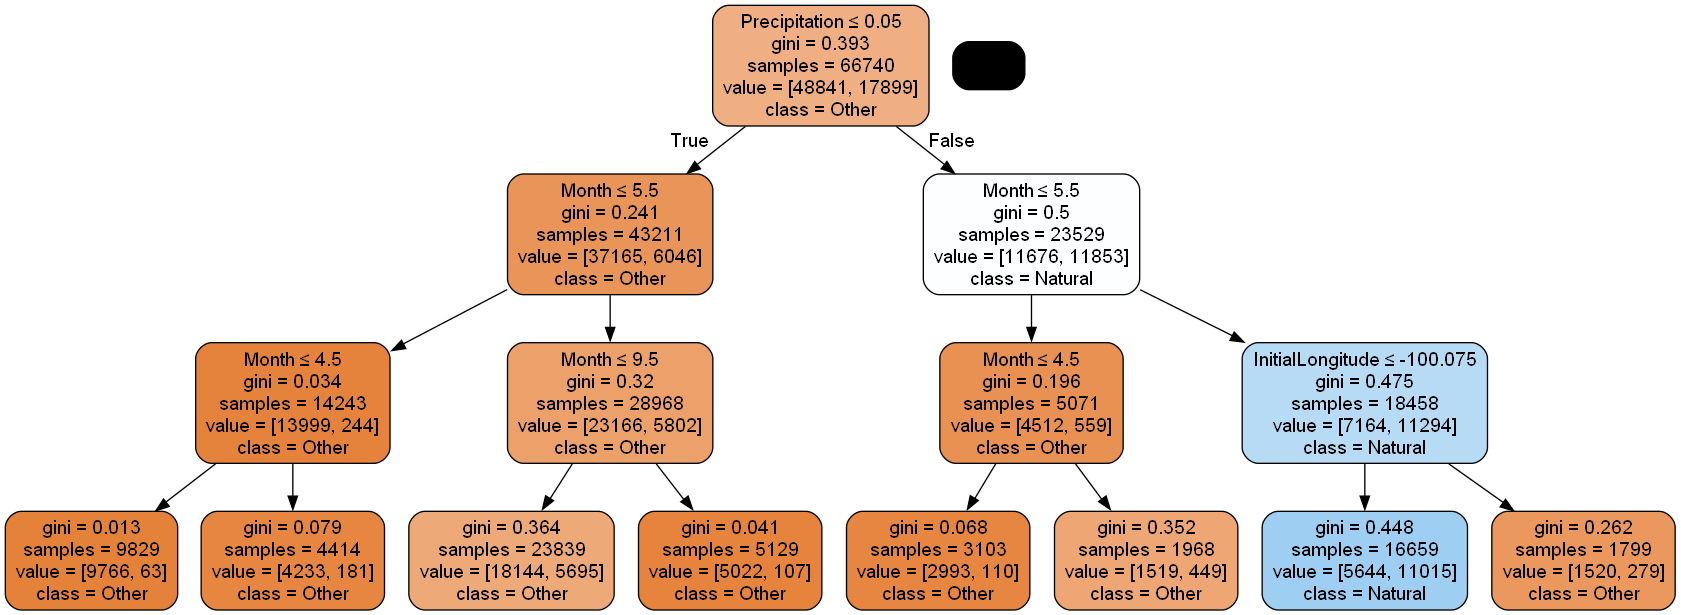

,Actual,Predicted,Prediction
34932,0,1,False
74424,0,0,True
60302,0,0,True
31405,0,0,True
14326,0,1,False
...,...,...,...
37531,0,0,True
64125,1,0,False
11861,0,1,False
39004,0,0,True


In [22]:
# Specify the target for prediction
target = 'CausedByWeather'
decision_tree_clf(df, target, True)

Random Forest Classifier model targeting the `'POOCounty'` column

In [15]:
# Specify the target for prediction
target = 'POOCounty'
random_forest_clf(df, target, False)

Accuracy on train data: 1.0
Accuracy on test data: 0.8489751887810141


Naive Bayes Classifier model targeting the `'POOCounty'` column

In [16]:
# Specify the target for prediction
target = 'POOCounty'
naive_bayes_clf(df, target, True)

Accuracy on train data: 0.6735990410548397
Accuracy on test data: 0.6449718326740981


,Actual,Predicted,Prediction
34932,136,173,False
74424,343,324,False
60302,448,448,True
31405,848,848,True
14326,243,204,False
...,...,...,...
37531,347,361,False
64125,177,177,True
11861,222,128,False
39004,173,504,False
